In [1]:
import sys
import logging
import gym
from gym import spaces
import numpy as np
import networkx as nx
import cyberbattle.simulation.actions as actions
import cyberbattle._env.cyberbattle_env as cyberbattle_env
import cyberbattle.agents.random_agent as random_agent
import cyberbattle.samples.chainpattern.chainpattern as chainpattern
import importlib
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity


In [2]:
gym_env = gym.make('CyberBattleCBSHH-v0')

iteration_count = 500
training_episode_count = 50
eval_episode_count = 10

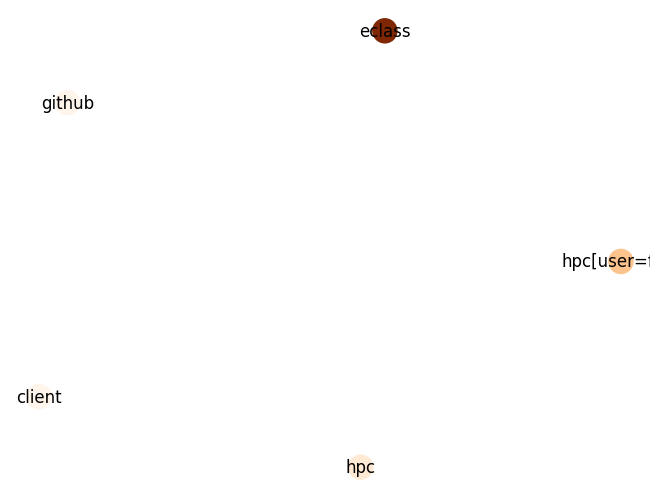

In [3]:
gym_env.environment.plot_environment_graph()

In [4]:
ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=12,
    maximum_total_credentials=5,
    identifiers=gym_env.identifiers
)

In [5]:
"""credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=2000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)"
)"""

'credlookup_run = learner.epsilon_greedy_search(\n    gym_env,\n    ep,\n    learner=rca.CredentialCacheExploiter(),\n    episode_count=10,\n    iteration_count=iteration_count,\n    epsilon=0.90,\n    render=False,\n    epsilon_exponential_decay=2000,\n    epsilon_minimum=0.01,\n    verbosity=Verbosity.Quiet,\n    title="Credential lookups (ϵ-greedy)"\n)'

In [ ]:
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=4,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=2000,
    epsilon_minimum=0.1,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL"
)

###### DQL
Learning with: episode_count=50,iteration_count=500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=2000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4
  ## Episode: 1/50 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 1|Iteration 3|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||/home/jupyter-hoodit/cyberbattle/CBSHH/cyberbattle/agents/baseline/agent_dql.py:382: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 500|reward: 1483.0|last_reward_at:  487|Elapsed Time: 0:00:01||


  Episode 1 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/69 (0.07)
    explore-remote: 2/185 (0.01)
    explore-connect: 3/145 (0.02)
    exploit-local: 1/15 (0.06)
    exploit-remote: 0/75 (0.00)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/50 'DQL' ϵ=0.7234, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 2|Iteration 169|reward: 4483.0|last_reward_at:  169|Elapsed Time: 0:00:00||


  Episode 2 ended at t=169 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/27 (0.07)
    explore-remote: 2/46 (0.04)
    explore-connect: 1/47 (0.02)
    exploit-local: 4/16 (0.20)
    exploit-remote: 0/14 (0.00)
    exploit-connect: 3/7 (0.30)
  exploit deflected to exploration: 1
  ## Episode: 3/50 'DQL' ϵ=0.6728, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 3|Iteration 98|reward: 4483.0|last_reward_at:   98|Elapsed Time: 0:00:00||


  Episode 3 ended at t=98 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 2/29 (0.06)
    explore-connect: 0/27 (0.00)
    exploit-local: 4/9 (0.31)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 3/13 (0.19)
  exploit deflected to exploration: 1
  ## Episode: 4/50 'DQL' ϵ=0.6455, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 4|Iteration 144|reward: 4483.0|last_reward_at:  144|Elapsed Time: 0:00:00||


  Episode 4 ended at t=144 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/19 (0.10)
    explore-remote: 2/33 (0.06)
    explore-connect: 1/30 (0.03)
    exploit-local: 4/14 (0.22)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 3/34 (0.08)
  exploit deflected to exploration: 1
  ## Episode: 5/50 'DQL' ϵ=0.6076, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 5|Iteration 344|reward: 4483.0|last_reward_at:  344|Elapsed Time: 0:00:01||


  Episode 5 ended at t=344 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/57 (0.03)
    explore-remote: 1/96 (0.01)
    explore-connect: 0/98 (0.00)
    exploit-local: 4/35 (0.10)
    exploit-remote: 2/5 (0.29)
    exploit-connect: 3/41 (0.07)
  exploit deflected to exploration: 53
  ## Episode: 6/50 'DQL' ϵ=0.5274, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 6|Iteration 148|reward: 4483.0|last_reward_at:  148|Elapsed Time: 0:00:00||


  Episode 6 ended at t=148 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/14 (0.18)
    explore-remote: 2/33 (0.06)
    explore-connect: 2/47 (0.04)
    exploit-local: 3/19 (0.14)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 2/22 (0.08)
  exploit deflected to exploration: 19
  ## Episode: 7/50 'DQL' ϵ=0.4969, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 7|Iteration 480|reward: 4483.0|last_reward_at:  480|Elapsed Time: 0:00:02||


  Episode 7 ended at t=480 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/45 (0.04)
    explore-remote: 2/92 (0.02)
    explore-connect: 0/95 (0.00)
    exploit-local: 4/53 (0.07)
    exploit-remote: 1/35 (0.03)
    exploit-connect: 3/148 (0.02)
  exploit deflected to exploration: 1
  ## Episode: 8/50 'DQL' ϵ=0.4122, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 8|Iteration 451|reward: 4483.0|last_reward_at:  451|Elapsed Time: 0:00:02||


  Episode 8 ended at t=451 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/28 (0.10)
    explore-remote: 1/72 (0.01)
    explore-connect: 2/67 (0.03)
    exploit-local: 3/6 (0.33)
    exploit-remote: 1/21 (0.05)
    exploit-connect: 2/245 (0.01)
  exploit deflected to exploration: 5
  ## Episode: 9/50 'DQL' ϵ=0.3492, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 9|Iteration 500|reward:   59.0|last_reward_at:   15|Elapsed Time: 0:00:02||


  Episode 9 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/33 (0.03)
    explore-remote: 2/75 (0.03)
    explore-connect: 0/58 (0.00)
    exploit-local: 2/3 (0.40)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 0/323 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 10/50 'DQL' ϵ=0.2940, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 10|Iteration 500|reward:   59.0|last_reward_at:   43|Elapsed Time: 0:00:02||


  Episode 10 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/23 (0.04)
    explore-remote: 1/53 (0.02)
    explore-connect: 0/49 (0.00)
    exploit-local: 2/1 (0.67)
    exploit-remote: 1/3 (0.25)
    exploit-connect: 0/366 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 11/50 'DQL' ϵ=0.2511, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 11|Iteration 500|reward:   59.0|last_reward_at:   26|Elapsed Time: 0:00:02||


  Episode 11 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/23 (0.00)
    explore-remote: 0/40 (0.00)
    explore-connect: 0/42 (0.00)
    exploit-local: 3/1 (0.75)
    exploit-remote: 2/5 (0.29)
    exploit-connect: 0/384 (0.00)
  exploit deflected to exploration: 1
  ## Episode: 12/50 'DQL' ϵ=0.2177, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 12|Iteration 500|reward:   59.0|last_reward_at:  115|Elapsed Time: 0:00:02||


  Episode 12 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/19 (0.05)
    explore-remote: 1/42 (0.02)
    explore-connect: 0/39 (0.00)
    exploit-local: 2/0 (1.00)
    exploit-remote: 1/3 (0.25)
    exploit-connect: 0/392 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 13/50 'DQL' ϵ=0.1917, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 13|Iteration 176|reward: 4471.0|last_reward_at:  176|Elapsed Time: 0:00:01||


  Episode 13 ended at t=176 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/18 (0.05)
    explore-connect: 0/13 (0.00)
    exploit-local: 3/25 (0.11)
    exploit-remote: 2/8 (0.20)
    exploit-connect: 3/98 (0.03)
  exploit deflected to exploration: 0
  ## Episode: 14/50 'DQL' ϵ=0.1839, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 14|Iteration 208|reward: 4483.0|last_reward_at:  208|Elapsed Time: 0:00:02||


  Episode 14 ended at t=208 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 0/46 (0.00)
    explore-connect: 1/51 (0.02)
    exploit-local: 4/22 (0.15)
    exploit-remote: 3/5 (0.38)
    exploit-connect: 2/61 (0.03)
  exploit deflected to exploration: 75
  ## Episode: 15/50 'DQL' ϵ=0.1756, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 15|Iteration 43|reward: 4483.0|last_reward_at:   43|Elapsed Time: 0:00:00||


  Episode 15 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/12 (0.14)
    explore-connect: 0/6 (0.00)
    exploit-local: 5/4 (0.56)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 4/4 (0.50)
  exploit deflected to exploration: 16
  ## Episode: 16/50 'DQL' ϵ=0.1740, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 16|Iteration 52|reward: 4483.0|last_reward_at:   52|Elapsed Time: 0:00:00||


  Episode 16 ended at t=52 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 2/8 (0.20)
    explore-connect: 0/7 (0.00)
    exploit-local: 6/2 (0.75)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 3/19 (0.14)
  exploit deflected to exploration: 14
  ## Episode: 17/50 'DQL' ϵ=0.1721, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 17|Iteration 178|reward: 4483.0|last_reward_at:  178|Elapsed Time: 0:00:01||


  Episode 17 ended at t=178 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/11 (0.27)
    explore-remote: 3/31 (0.09)
    explore-connect: 0/29 (0.00)
    exploit-local: 2/46 (0.04)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 3/46 (0.06)
  exploit deflected to exploration: 47
  ## Episode: 18/50 'DQL' ϵ=0.1660, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 18|Iteration 121|reward: 4483.0|last_reward_at:  121|Elapsed Time: 0:00:00||


  Episode 18 ended at t=121 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 0/11 (0.00)
    explore-connect: 0/17 (0.00)
    exploit-local: 5/38 (0.12)
    exploit-remote: 3/2 (0.60)
    exploit-connect: 3/36 (0.08)
  exploit deflected to exploration: 15
  ## Episode: 19/50 'DQL' ϵ=0.1621, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 19|Iteration 213|reward: 4483.0|last_reward_at:  213|Elapsed Time: 0:00:01||


  Episode 19 ended at t=213 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/11 (0.21)
    explore-remote: 2/25 (0.07)
    explore-connect: 1/24 (0.04)
    exploit-local: 3/71 (0.04)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 3/69 (0.04)
  exploit deflected to exploration: 22
  ## Episode: 20/50 'DQL' ϵ=0.1558, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 20|Iteration 412|reward: 4483.0|last_reward_at:  412|Elapsed Time: 0:00:02||


  Episode 20 ended at t=412 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 3/25 (0.11)
    explore-connect: 0/41 (0.00)
    exploit-local: 4/129 (0.03)
    exploit-remote: 0/4 (0.00)
    exploit-connect: 3/194 (0.02)
  exploit deflected to exploration: 7
  ## Episode: 21/50 'DQL' ϵ=0.1454, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 21|Iteration 500|reward:  474.0|last_reward_at:  430|Elapsed Time: 0:00:03||


  Episode 21 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/17 (0.06)
    explore-remote: 1/19 (0.05)
    explore-connect: 1/31 (0.03)
    exploit-local: 4/415 (0.01)
    exploit-remote: 1/2 (0.33)
    exploit-connect: 1/7 (0.12)
  exploit deflected to exploration: 4
  ## Episode: 22/50 'DQL' ϵ=0.1354, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 22|Iteration 500|reward:  174.0|last_reward_at:  344|Elapsed Time: 0:00:03||


  Episode 22 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 1/23 (0.04)
    explore-connect: 0/30 (0.00)
    exploit-local: 3/420 (0.01)
    exploit-remote: 1/5 (0.17)
    exploit-connect: 1/1 (0.50)
  exploit deflected to exploration: 0
  ## Episode: 23/50 'DQL' ϵ=0.1276, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 23|Iteration 500|reward:  163.0|last_reward_at:  378|Elapsed Time: 0:00:03||


  Episode 23 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 2/21 (0.09)
    explore-connect: 0/21 (0.00)
    exploit-local: 2/444 (0.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/2 (0.33)
  exploit deflected to exploration: 0
  ## Episode: 24/50 'DQL' ϵ=0.1215, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 24|Iteration 500|reward:  165.0|last_reward_at:  215|Elapsed Time: 0:00:03||


  Episode 24 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/10 (0.29)
    explore-remote: 1/24 (0.04)
    explore-connect: 0/24 (0.00)
    exploit-local: 1/430 (0.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/5 (0.17)
  exploit deflected to exploration: 0
  ## Episode: 25/50 'DQL' ϵ=0.1167, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 25|Iteration 458|reward: 4483.0|last_reward_at:  458|Elapsed Time: 0:00:04||


  Episode 25 ended at t=458 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 1/34 (0.03)
    explore-connect: 0/33 (0.00)
    exploit-local: 4/349 (0.01)
    exploit-remote: 2/17 (0.11)
    exploit-connect: 3/6 (0.33)
  exploit deflected to exploration: 22
  ## Episode: 26/50 'DQL' ϵ=0.1133, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 26|Iteration 170|reward: 4474.0|last_reward_at:  170|Elapsed Time: 0:00:01||


  Episode 26 ended at t=170 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/6 (0.14)
    explore-connect: 0/11 (0.00)
    exploit-local: 5/92 (0.05)
    exploit-remote: 1/30 (0.03)
    exploit-connect: 3/16 (0.16)
  exploit deflected to exploration: 3
  ## Episode: 27/50 'DQL' ϵ=0.1122, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 27|Iteration 500|reward:  174.0|last_reward_at:  190|Elapsed Time: 0:00:03||


  Episode 27 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 0/29 (0.00)
    explore-connect: 0/28 (0.00)
    exploit-local: 4/189 (0.02)
    exploit-remote: 2/141 (0.01)
    exploit-connect: 1/94 (0.01)
  exploit deflected to exploration: 6
  ## Episode: 28/50 'DQL' ϵ=0.1095, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 28|Iteration 110|reward: 4474.0|last_reward_at:  110|Elapsed Time: 0:00:00||


  Episode 28 ended at t=110 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/3 (0.25)
    explore-connect: 0/7 (0.00)
    exploit-local: 5/42 (0.11)
    exploit-remote: 1/26 (0.04)
    exploit-connect: 3/20 (0.13)
  exploit deflected to exploration: 3
  ## Episode: 29/50 'DQL' ϵ=0.1090, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 29|Iteration 41|reward: 4474.0|last_reward_at:   41|Elapsed Time: 0:00:00||


  Episode 29 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/0 (1.00)
    explore-remote: 0/3 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 4/6 (0.40)
    exploit-remote: 2/16 (0.11)
    exploit-connect: 3/5 (0.38)
  exploit deflected to exploration: 2
  ## Episode: 30/50 'DQL' ϵ=0.1088, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 30|Iteration 366|reward: 4483.0|last_reward_at:  366|Elapsed Time: 0:00:02||


  Episode 30 ended at t=366 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 1/17 (0.06)
    explore-connect: 1/14 (0.07)
    exploit-local: 4/67 (0.06)
    exploit-remote: 2/212 (0.01)
    exploit-connect: 2/38 (0.05)
  exploit deflected to exploration: 8
  ## Episode: 31/50 'DQL' ϵ=0.1073, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 31|Iteration 136|reward: 4483.0|last_reward_at:  136|Elapsed Time: 0:00:01||


  Episode 31 ended at t=136 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 0/16 (0.00)
    explore-connect: 0/16 (0.00)
    exploit-local: 4/19 (0.17)
    exploit-remote: 2/66 (0.03)
    exploit-connect: 4/2 (0.67)
  exploit deflected to exploration: 30
  ## Episode: 32/50 'DQL' ϵ=0.1069, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 32|Iteration 64|reward: 4483.0|last_reward_at:   64|Elapsed Time: 0:00:00||


  Episode 32 ended at t=64 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/2 (0.60)
    explore-remote: 0/9 (0.00)
    explore-connect: 0/8 (0.00)
    exploit-local: 3/6 (0.33)
    exploit-remote: 3/16 (0.16)
    exploit-connect: 3/11 (0.21)
  exploit deflected to exploration: 11
  ## Episode: 33/50 'DQL' ϵ=0.1066, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 33|Iteration 84|reward: 4477.0|last_reward_at:   84|Elapsed Time: 0:00:00||


  Episode 33 ended at t=84 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/8 (0.00)
    explore-connect: 0/9 (0.00)
    exploit-local: 4/9 (0.31)
    exploit-remote: 3/35 (0.08)
    exploit-connect: 3/11 (0.21)
  exploit deflected to exploration: 6
  ## Episode: 34/50 'DQL' ϵ=0.1064, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 34|Iteration 114|reward: 4483.0|last_reward_at:  114|Elapsed Time: 0:00:00||


  Episode 34 ended at t=114 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 6/23 (0.21)
    exploit-remote: 3/47 (0.06)
    exploit-connect: 3/24 (0.11)
  exploit deflected to exploration: 3
  ## Episode: 35/50 'DQL' ϵ=0.1060, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 35|Iteration 287|reward: 4483.0|last_reward_at:  287|Elapsed Time: 0:00:01||


  Episode 35 ended at t=287 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/16 (0.00)
    explore-connect: 0/17 (0.00)
    exploit-local: 6/35 (0.15)
    exploit-remote: 2/146 (0.01)
    exploit-connect: 4/59 (0.06)
  exploit deflected to exploration: 6
  ## Episode: 36/50 'DQL' ϵ=0.1052, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 36|Iteration 134|reward: 4483.0|last_reward_at:  134|Elapsed Time: 0:00:00||


  Episode 36 ended at t=134 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/4 (0.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 5/21 (0.19)
    exploit-remote: 3/46 (0.06)
    exploit-connect: 3/47 (0.06)
  exploit deflected to exploration: 1
  ## Episode: 37/50 'DQL' ϵ=0.1049, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 37|Iteration 218|reward: 4477.0|last_reward_at:  218|Elapsed Time: 0:00:01||


  Episode 37 ended at t=218 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 0/9 (0.00)
    explore-connect: 0/19 (0.00)
    exploit-local: 4/37 (0.10)
    exploit-remote: 2/99 (0.02)
    exploit-connect: 4/38 (0.10)
  exploit deflected to exploration: 12
  ## Episode: 38/50 'DQL' ϵ=0.1044, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 38|Iteration 336|reward: 4477.0|last_reward_at:  336|Elapsed Time: 0:00:02||


  Episode 38 ended at t=336 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 0/26 (0.00)
    explore-connect: 0/40 (0.00)
    exploit-local: 4/51 (0.07)
    exploit-remote: 2/194 (0.01)
    exploit-connect: 4/5 (0.44)
  exploit deflected to exploration: 41
  ## Episode: 39/50 'DQL' ϵ=0.1037, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 39|Iteration 147|reward: 4483.0|last_reward_at:  147|Elapsed Time: 0:00:00||


  Episode 39 ended at t=147 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/0 (1.00)
    explore-remote: 0/8 (0.00)
    explore-connect: 0/15 (0.00)
    exploit-local: 4/17 (0.19)
    exploit-remote: 2/82 (0.02)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 5
  ## Episode: 40/50 'DQL' ϵ=0.1034, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 40|Iteration 167|reward: 4483.0|last_reward_at:  167|Elapsed Time: 0:00:01||


  Episode 40 ended at t=167 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 0/18 (0.00)
    explore-connect: 0/19 (0.00)
    exploit-local: 5/23 (0.18)
    exploit-remote: 2/89 (0.02)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 30
  ## Episode: 41/50 'DQL' ϵ=0.1032, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 41|Iteration 87|reward: 4483.0|last_reward_at:   87|Elapsed Time: 0:00:00||


  Episode 41 ended at t=87 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/4 (0.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 5/10 (0.33)
    exploit-remote: 2/49 (0.04)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 3
  ## Episode: 42/50 'DQL' ϵ=0.1030, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 42|Iteration 142|reward: 4483.0|last_reward_at:  142|Elapsed Time: 0:00:01||


  Episode 42 ended at t=142 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/10 (0.09)
    explore-connect: 0/13 (0.00)
    exploit-local: 5/13 (0.28)
    exploit-remote: 1/85 (0.01)
    exploit-connect: 4/8 (0.33)
  exploit deflected to exploration: 17
  ## Episode: 43/50 'DQL' ϵ=0.1028, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 43|Iteration 111|reward: 4483.0|last_reward_at:  111|Elapsed Time: 0:00:00||


  Episode 43 ended at t=111 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/11 (0.00)
    explore-connect: 0/7 (0.00)
    exploit-local: 5/23 (0.18)
    exploit-remote: 2/57 (0.03)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 8
  ## Episode: 44/50 'DQL' ϵ=0.1027, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 44|Iteration 257|reward: 4483.0|last_reward_at:  257|Elapsed Time: 0:00:02||


  Episode 44 ended at t=257 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 2/24 (0.08)
    explore-connect: 0/18 (0.00)
    exploit-local: 5/46 (0.10)
    exploit-remote: 0/149 (0.00)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 30
  ## Episode: 45/50 'DQL' ϵ=0.1023, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 45|Iteration 70|reward: 4483.0|last_reward_at:   70|Elapsed Time: 0:00:00||


  Episode 45 ended at t=70 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/3 (0.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 5/7 (0.42)
    exploit-remote: 2/34 (0.06)
    exploit-connect: 4/9 (0.31)
  exploit deflected to exploration: 3
  ## Episode: 46/50 'DQL' ϵ=0.1023, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 46|Iteration 77|reward: 4483.0|last_reward_at:   77|Elapsed Time: 0:00:00||


  Episode 46 ended at t=77 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/5 (0.17)
    explore-connect: 0/8 (0.00)
    exploit-local: 5/12 (0.29)
    exploit-remote: 1/29 (0.03)
    exploit-connect: 4/10 (0.29)
  exploit deflected to exploration: 9
  ## Episode: 47/50 'DQL' ϵ=0.1022, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 47|Iteration 253|reward: 4483.0|last_reward_at:  253|Elapsed Time: 0:00:04||


  Episode 47 ended at t=253 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/21 (0.05)
    explore-remote: 0/82 (0.00)
    explore-connect: 0/96 (0.00)
    exploit-local: 5/10 (0.33)
    exploit-remote: 2/15 (0.12)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 178
  ## Episode: 48/50 'DQL' ϵ=0.1019, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 48|Iteration 298|reward:  174.0|last_reward_at:  146|Elapsed Time: 0:00:01||

In [ ]:
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run['learner'],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=True,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL"
)

In [ ]:
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search"
)

In [ ]:
all_runs = [
    random_run,
    dql_exploit_run,
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})")

In [ ]:
contenders = [
    random_run,
    dql_exploit_run,
]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f'Agent Benchmark top contenders\n'
    f'max_nodes:{ep.maximum_node_count}\n',
    all_runs=contenders)

In [ ]:
for r in contenders:
    p.plot_all_episodes(r)